In [1]:
import sarracen as src
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

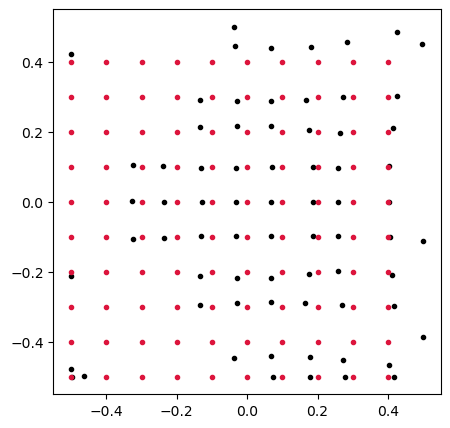

In [2]:
sdf_ini = pd.read_csv('../Data/initial_distribution/ideal_gas.csv')
sdf_n = pd.read_csv('../Data/results/ideal_gas/final.csv')

fig = plt.figure(figsize=(5,5))
plt.plot(sdf_n['x'], sdf_n['y'], '.', color='k')
plt.plot(sdf_ini['x'], sdf_ini['y'], '.', color='crimson')
plt.show()

In [3]:
sdf = src.read_csv('../Data/results/ideal_gas/final.csv')
sdf.params={'mass':1.0}
sdf.describe()

,x,y,vx,vy,u,h,rho
count,71.000000,71.000000,71.000000,71.000000,100.000000,100.000000,100.000000
mean,0.075440,-0.039142,-0.061540,-0.003970,1.002448,0.172115,52.987213
std,0.265843,0.298029,0.226656,0.192586,0.145849,0.034207,39.993154
min,-0.499923,-0.499990,-0.515517,-0.798827,0.735251,0.079840,0.000000
25%,-0.083622,-0.287911,-0.123938,-0.070250,0.924946,0.142947,0.000000
50%,0.068482,-0.000668,-0.089545,-0.002240,0.965074,0.167881,61.095925
75%,0.265225,0.209125,0.006830,0.048215,1.038278,0.200000,88.653666
max,0.499977,0.499957,1.186587,0.978441,1.569855,0.276608,176.070203


/home/jack/anaconda3/lib/python3.10/site-packages/sarracen/interpolate/interpolate.py:342: RuntimeWarning: invalid value encountered in divide
  return target_data * mass_data / rho_data


<Axes: xlabel='x', ylabel='y'>

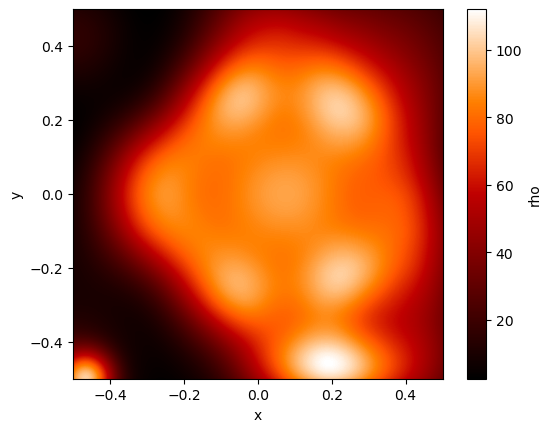

In [4]:
sdf.render('rho', xsec=0.0)

# Conservation of Angular Momentum

In [5]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [6]:
T = 7
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/ideal_gas/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

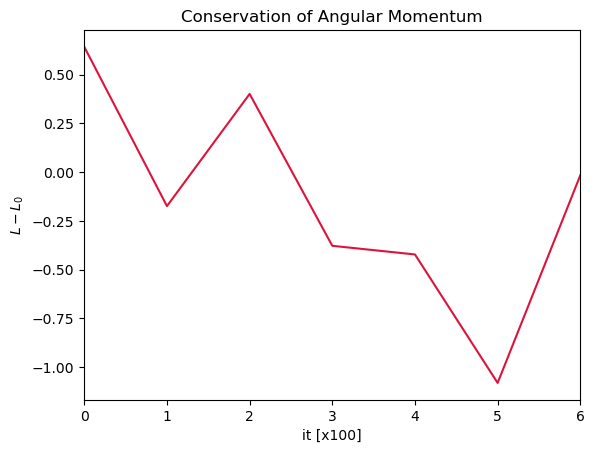

In [7]:
plt.plot(time[:], ang_mom[:], '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel("$L-L_0$")
plt.xlim(0, T-1)
plt.show()

# Conservation of Energy

In [8]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [9]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/ideal_gas/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

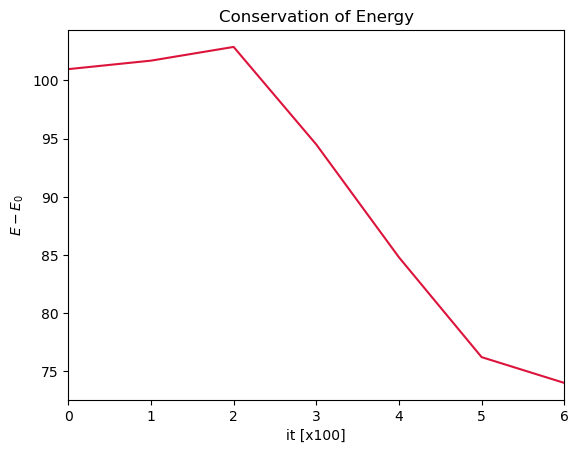

In [10]:
plt.plot(time[:], energ[:], '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel("$E-E_0$")
plt.xlim(0, T-1)
plt.show()